<a href="https://colab.research.google.com/github/gazabAnurag/TF_BETARUNS/blob/master/TF_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

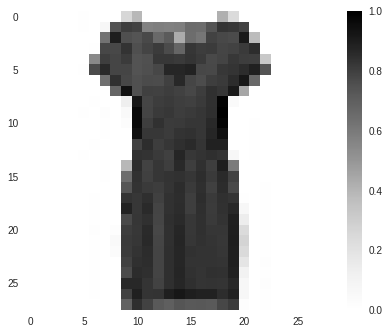

In [17]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)

In [0]:
#normalize the image values
x_train,x_test = x_train/255.0,x_test/255.0

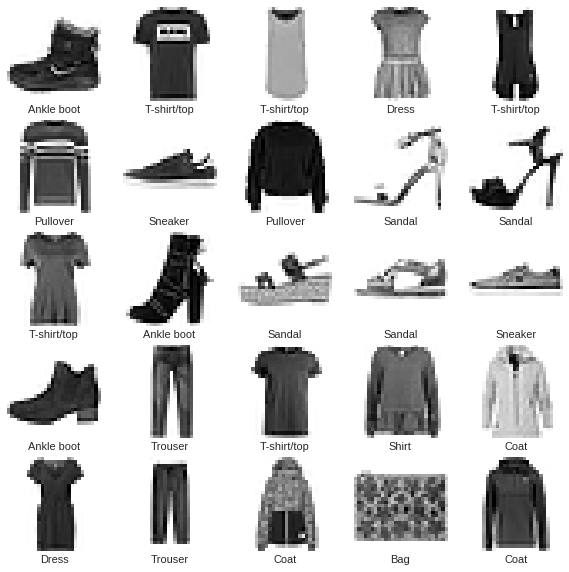

In [20]:
 plt.figure(figsize=(10,10))
 for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(x_train[i],cmap=plt.cm.binary)
   plt.xlabel(class_names[y_train[i]])

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),  #flattens the image to 1D
    keras.layers.Dense(128,activation=tf.nn.relu), #hidden layer with 128 units
    keras.layers.Dense(10,activation=tf.nn.softmax)  #output layer fully connected
    ])
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2832 - acc: 0.8942
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2703 - acc: 0.9001
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2595 - acc: 0.9036
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2481 - acc: 0.9084
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2418 - acc: 0.9100
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2329 - acc: 0.9118
Epoch 7/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2246 - acc: 0.9175
Epoch 8/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2187 - acc: 0.9181
Epoch 9/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2095 - acc: 0.9207
Epoch 10/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2052 - acc: 0.9229

In [29]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

10000/10000 [==============================] - 0s 32us/step
0.3494238464951515 0.8847


In [0]:
pred = model.predict(x_test)

In [35]:
np.argmax(pred[0])

9

In [36]:
y_test[0]

9

In [0]:
def plot_image(i,predicted,actual,img):
  pred,act,img = predicted[i],actual[i],img[i]
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  pred_class = np.argmax(pred)
  if act==pred_class:
    color = 'blue'
  else:
    color='red'
  plt.xlabel("{} {:3.0f}% ({})".format(class_names[pred_class],100*np.max(pred),class_names[act]),color=color)

def plot_value_array(i,pred,act):
  pred,act= pred[i],act[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10),pred,color='gray')
  plt.ylim([0,1])
  maxArg = np.argmax(pred)
  thisplot[maxArg].set_color('red')
  thisplot[act].set_color('blue')

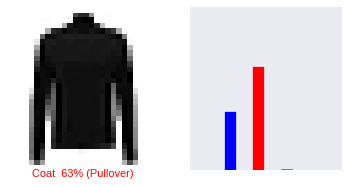

In [46]:
i=255
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,y_test,x_test)
plt.subplot(1,2,2)
plot_value_array(i,pred,y_test)

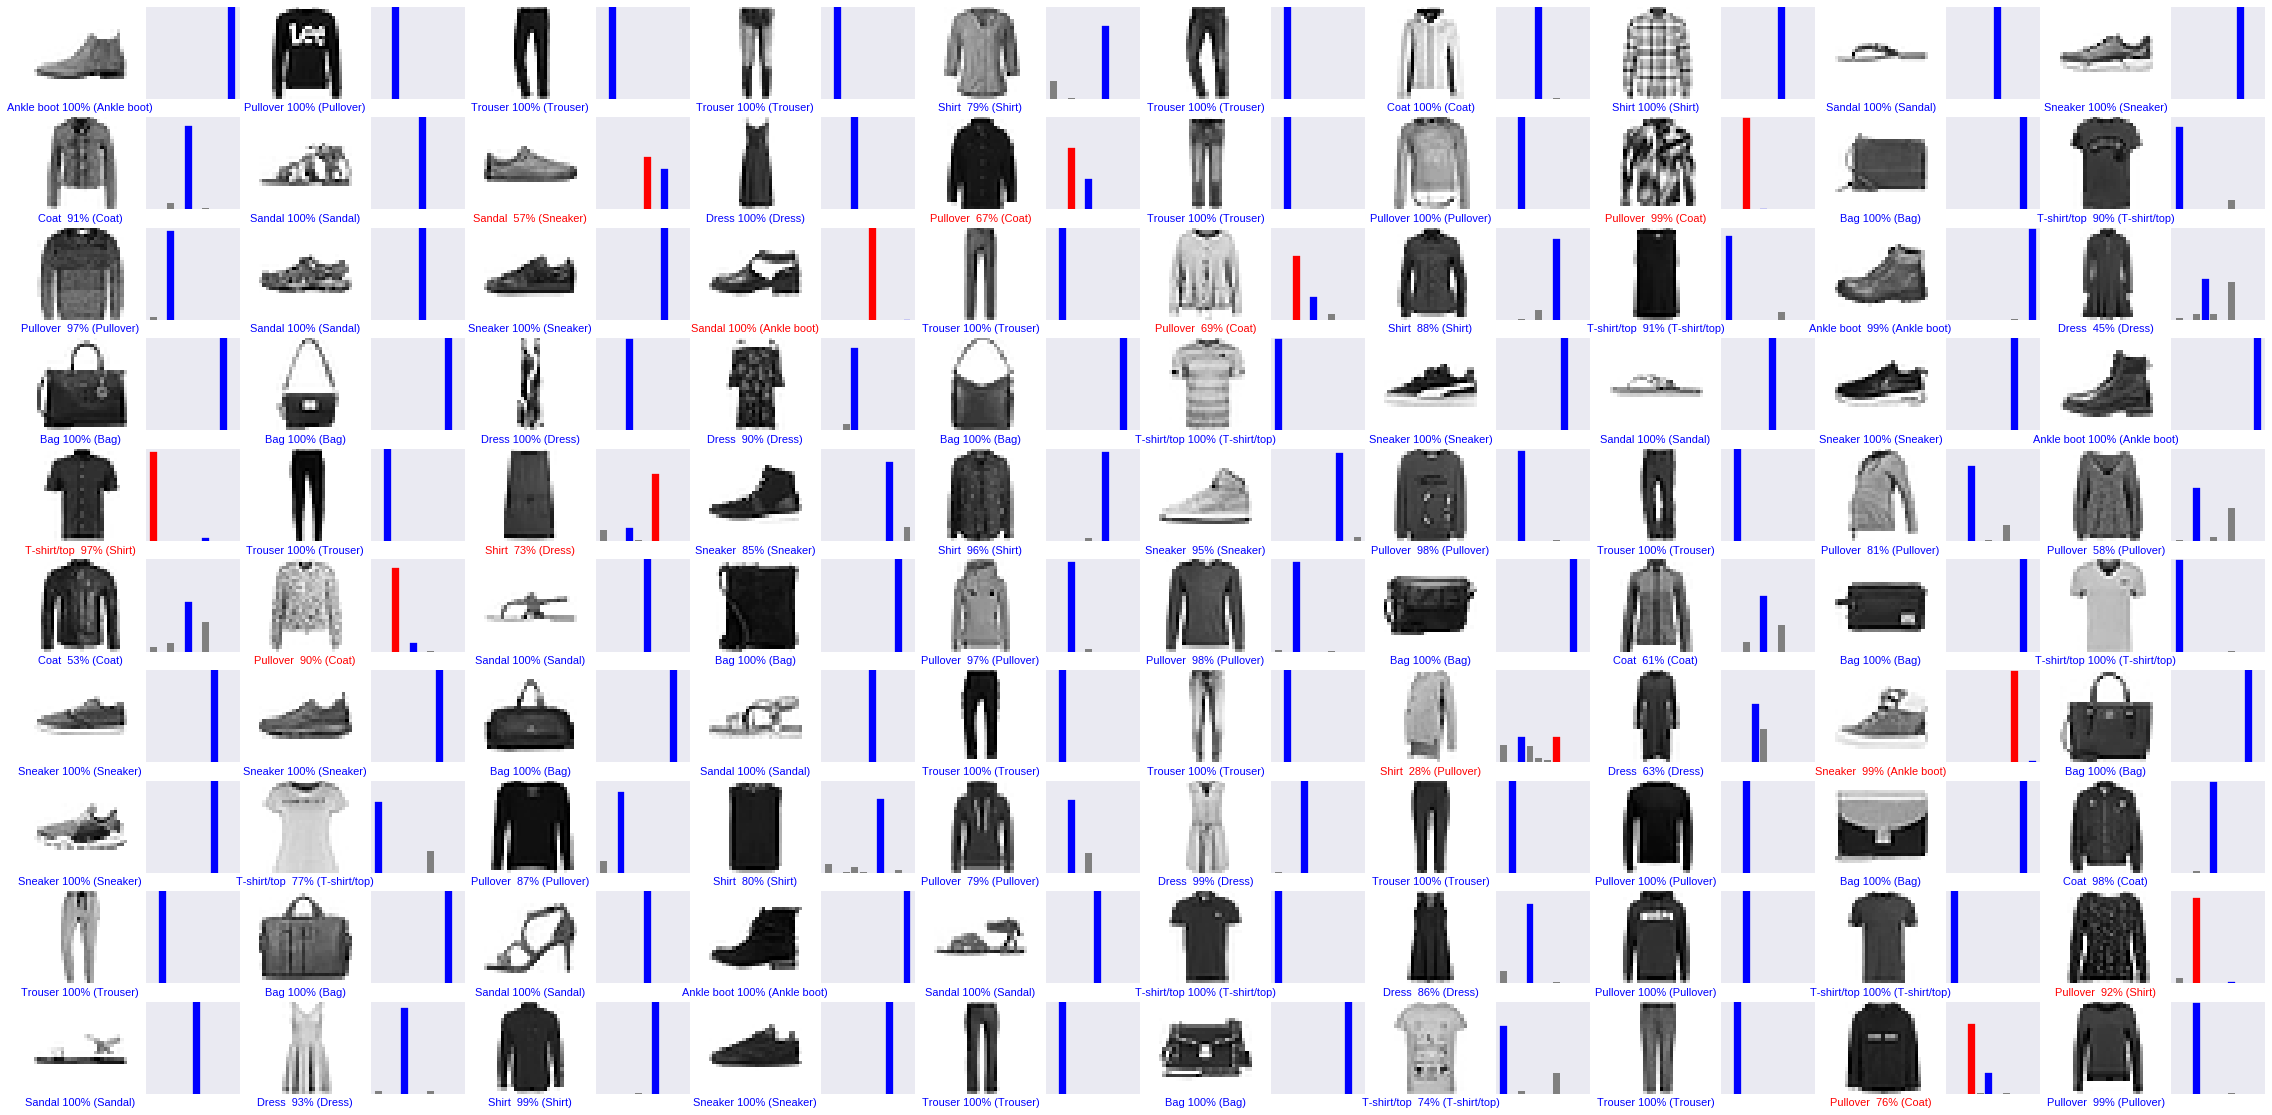

In [48]:
rows = 10
col = 10
n = rows*col
plt.figure(figsize=(2*2*rows,2*col))
for i in range(n):
  plt.subplot(rows,2*col,2*i+1)
  plot_image(i,pred,y_test,x_test)
  plt.subplot(rows,2*col,2*i+2)
  plot_value_array(i,pred,y_test)

In [52]:
np.expand_dims(x_train[0],0).shape

(1, 28, 28)

In [54]:
x_train.shape

(60000, 28, 28)